In [ ]:
## 1.1. Introduction
This data set contains information about patients who may have heart disease.

*We will build a machine learning model to determine heart disease.*

In [ ]:
## 1.2. Description of the dataset🧾
*  Age (AGE). 
*  Gender (SEX): 0 – female 1 – male
* Obesity in the anamnesis (endocr_02): 0 – no 1 – yes
* Presence of an essential hypertension (GB): 0 – there is no essential hypertension 1 – Stage 1 2 – Stage 2 3 – Stage 3 
* Symptomatic hypertension (SIM_GIPERT): 0 – no 1 – yes
* Duration of arterial hypertension (DLIT_AG): 0 – there was no arterial hypertension 1 – one year 2 – two years 3 – three years 4 – four years 5 – five years 6 – 6-10 years 7 – more than 10 years
* Diabetes mellitus in the anamnesis (endocr_01): 0 – no 1 – yes
* Quantity of myocardial infarctions in the anamnesis (INF_ANAM): 0 – zero 1 – one 2 – two 3 – three and more
* Presence of an anterior myocardial infarction (left ventricular) (ECG changes in leads V1 – V4 ) (ant_im): 0 – there is no infarct in this location 1 – QRS has no changes 2 – QRS is like QR-complex 3 – QRS is like Qr-complex 4 – QRS is like QS-complex 
* Presence of a lateral myocardial infarction (left ventricular) (ECG changes in leads V5 – V6 , I, AVL) (lat_im): 0 – there is no infarct in this location 1 – QRS has no changes 2 – QRS is like QR-complex 3 – QRS is like Qr-complex 4 – QRS is like QS-complex 
* Presence of an inferior myocardial infarction (left ventricular) (ECG changes in leads III, AVF, II). (inf_im): 0 – there is no infarct in this location 1 – QRS has no changes 2 – QRS is like QR-complex 3 – QRS is like Qr-complex 4 – QRS is like QS-complex 
* Presence of a posterior myocardial infarction (left ventricular) (ECG changes in V7 – V9, reciprocity changes in leads V1 – V3) (post_im): 0 – there is no infarct in this location 1 – QRS has no changes 2 – QRS is like QR-complex 3 – QRS is like Qr-complex 4 – QRS is like QS-complex 
* Presence of a right ventricular myocardial infarction (IM_PG_P): 0 – no 1 – yes
* Myocardial rupture (RAZRIV): 0 – no 1 – yes
* Relapse of the myocardial infarction (REC_IM): 0 – no 1 – yes
* Lethal outcome (cause) (LET_IS): 0 – unknown 1 – cardiogenic shock 2 – pulmonary edema 3 – myocardial rupture 4 – progress of congestive heart failure 5 – thromboembolism 6 – asystole 7 – ventricular fibrillation


In [21]:
import numpy 
import pandas 
import matplotlib.pyplot 
import seaborn 
import os
import warnings

from sklearn.pipeline import Pipeline
from matplotlib.collections import PathCollection
from matplotlib.colors import ListedColormap
from statsmodels.graphics.gofplots import qqplot
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV, train_test_split, learning_curve, ShuffleSplit, cross_val_score, KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge, Perceptron, LogisticRegression
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.feature_selection import RFE
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier

warnings.simplefilter(action='ignore', category=FutureWarning)

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings



In [58]:
pip install xlrd==1.2.0


Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd

df = pd.read_csv("C:/Users/anilr/Downloads/Myocardial infarction complications Database (2).csv")


In [13]:

# Check the available columns
print(df.columns)

# Select columns, ensuring they exist
columns_to_select = ['AGE', 'SEX', 'endocr_02', 'GB', 'SIM_GIPERT', 'DLIT_AG', 'endocr_01', 'INF_ANAM', 'ant_im', 'lat_im', 'post_im', 'IM_PG_P', 'RAZRIV', 'REC_IM', 'LET_IS']
existing_columns = [col for col in columns_to_select if col in df.columns]

# Create the new DataFrame
nd = df[existing_columns]

# Display the first 100 rows with a background gradient
nd.head(100).style.background_gradient(cmap='Greens')


Index(['AGE', 'SEX', 'endocr_02', 'GB', 'SIM_GIPERT', 'DLIT_AG', 'endocr_01',
       'INF_ANAM', 'ant_im', 'lat_im', 'post_im', 'IM_PG_P', 'LET_IS'],
      dtype='object')


,AGE,SEX,endocr_02,GB,SIM_GIPERT,DLIT_AG,endocr_01,INF_ANAM,ant_im,lat_im,post_im,IM_PG_P,LET_IS
0,70.000000,0,0.000000,2.000000,0.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1
1,82.000000,0,0.000000,0.000000,1.000000,7.000000,0.000000,1.000000,4.000000,2.000000,0.000000,0.000000,1
2,69.000000,0,0.000000,3.000000,0.000000,7.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1
3,53.000000,1,0.000000,2.000000,0.000000,1.000000,0.000000,1.000000,4.000000,1.000000,0.000000,0.000000,6
4,76.000000,0,0.000000,3.000000,0.000000,7.000000,1.000000,3.000000,0.000000,0.000000,1.000000,0.000000,2
5,73.000000,1,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2
6,54.000000,0,0.000000,2.000000,0.000000,6.000000,1.000000,0.000000,4.000000,3.000000,0.000000,0.000000,1
7,82.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,1
8,68.000000,0,1.000000,0.000000,1.000000,7.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1
9,66.000000,1,0.000000,2.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3


In [15]:
print('\033[1m'+'Dataframe dimension:'+'\033[0m')
print('*' * 30)
print('Number of lines:', nd.shape[0])
print('Number of columns:', nd.shape[1])
print('*' * 30)
print('\n')

print('\033[1m'+'Null values:'+'\033[0m')
print('*' * 30)
print(nd.isna().sum())
print('*' * 30)
print('\n')

print('\033[1m'+'\nDataframe info:\n'+'\033[0m')
nd.info(memory_usage = False)

Dataframe dimension:
******************************
Number of lines: 1640
Number of columns: 13
******************************


Null values:
******************************
AGE           0
SEX           0
endocr_02     0
GB            0
SIM_GIPERT    0
DLIT_AG       0
endocr_01     0
INF_ANAM      0
ant_im        0
lat_im        0
post_im       0
IM_PG_P       0
LET_IS        0
dtype: int64
******************************



Dataframe info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640 entries, 0 to 1639
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   AGE         1640 non-null   float64
 1   SEX         1640 non-null   int64  
 2   endocr_02   1640 non-null   float64
 3   GB          1640 non-null   float64
 4   SIM_GIPERT  1640 non-null   float64
 5   DLIT_AG     1640 non-null   float64
 6   endocr_01   1640 non-null   float64
 7   INF_ANAM    1640 non-null   float64
 8   ant_im      1640 non-null   float

In [17]:
nd.isna().sum()

AGE           0
SEX           0
endocr_02     0
GB            0
SIM_GIPERT    0
DLIT_AG       0
endocr_01     0
INF_ANAM      0
ant_im        0
lat_im        0
post_im       0
IM_PG_P       0
LET_IS        0
dtype: int64

In [21]:
nd.dropna(inplace=True)

In [23]:
nd.isna().sum()

AGE           0
SEX           0
endocr_02     0
GB            0
SIM_GIPERT    0
DLIT_AG       0
endocr_01     0
INF_ANAM      0
ant_im        0
lat_im        0
post_im       0
IM_PG_P       0
LET_IS        0
dtype: int64

In [25]:
print('\033[1m'+'Descriptive statistics:'+'\033[0m')
nd.describe().style.background_gradient(cmap='Greens')

Descriptive statistics:


,AGE,SEX,endocr_02,GB,SIM_GIPERT,DLIT_AG,endocr_01,INF_ANAM,ant_im,lat_im,post_im,IM_PG_P,LET_IS
count,1640.000000,1640.000000,1640.000000,1640.000000,1640.000000,1640.000000,1640.000000,1640.000000,1640.000000,1640.000000,1640.000000,1640.000000,1640.000000
mean,66.975610,0.518293,0.054878,1.481707,0.054878,4.091463,0.213415,0.585366,2.341463,1.158537,0.286585,0.109756,3.189024
std,9.516660,0.499818,0.227812,1.155788,0.227812,3.036917,0.409843,0.862071,1.892276,1.053418,0.739088,0.312681,2.085922
min,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,61.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,67.000000,1.000000,0.000000,2.000000,0.000000,6.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,3.000000
75%,75.000000,1.000000,0.000000,2.000000,0.000000,7.000000,0.000000,1.000000,4.000000,2.000000,0.000000,0.000000,5.000000
max,90.000000,1.000000,1.000000,3.000000,1.000000,7.000000,1.000000,3.000000,4.000000,4.000000,4.000000,1.000000,7.000000


In [ ]:
## 1.3. Visualization

In [27]:
nd['endocr_02'].describe()

count    1640.000000
mean        0.054878
std         0.227812
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: endocr_02, dtype: float64

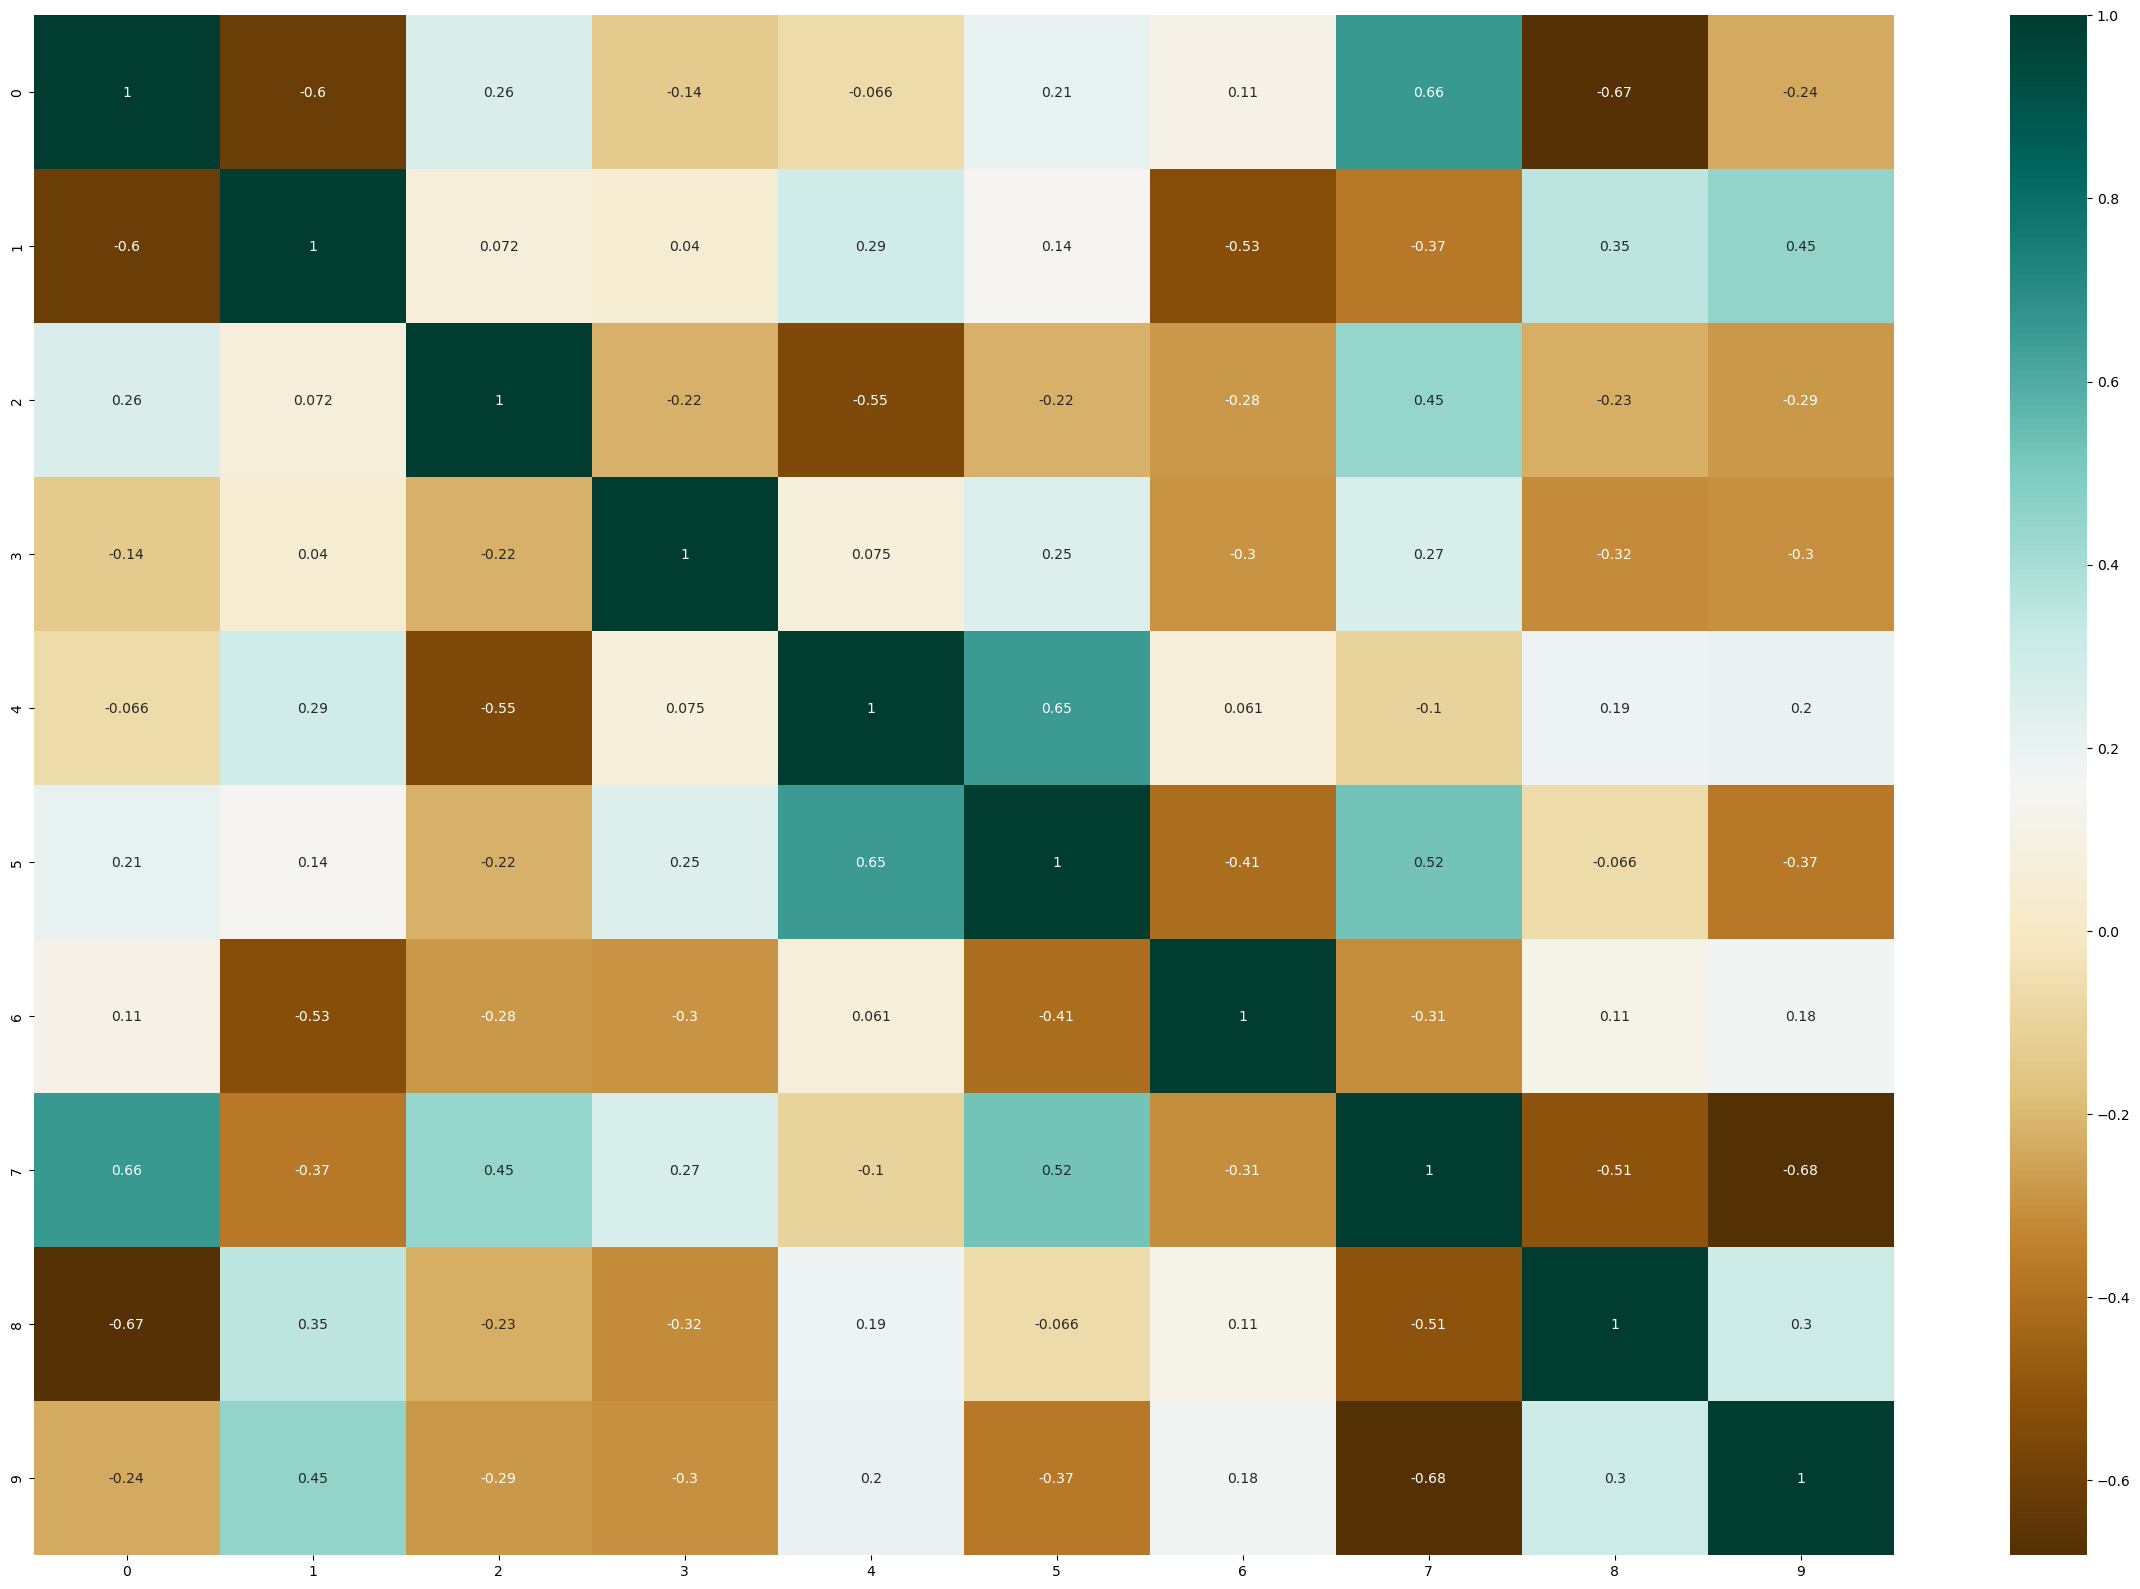

In [35]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  # Import plt

nd = np.random.rand(10, 10)  # Dummy data for the example

plt.figure(figsize=(30, 20))
c = np.corrcoef(nd.T)  # Calculate correlation matrix; transpose if necessary
sns.heatmap(c, cmap="BrBG", annot=True)
plt.show()  # Display the plot



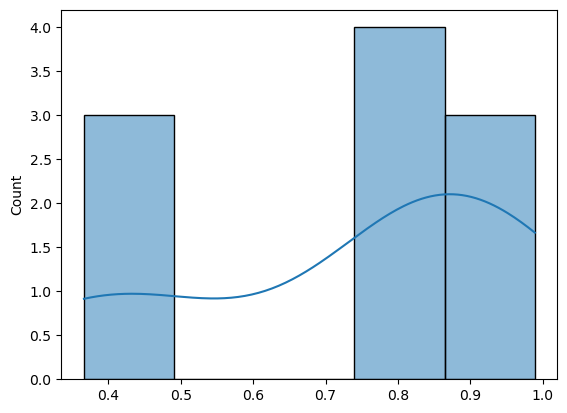

In [41]:
sns.histplot(nd[:, 1], kde=True)  # Access the second column
plt.show()


In [45]:
import pandas as pd

# Assuming `nd` is a 2D NumPy array and you have the appropriate column names
# Replace this with your actual data and column names
column_names = ['AGE', 'endocr_02', 'SEX']  # Example column names
nd = np.random.rand(100, 3)  # Example random data; replace with your actual data

# Create a DataFrame
df = pd.DataFrame(nd, columns=column_names)


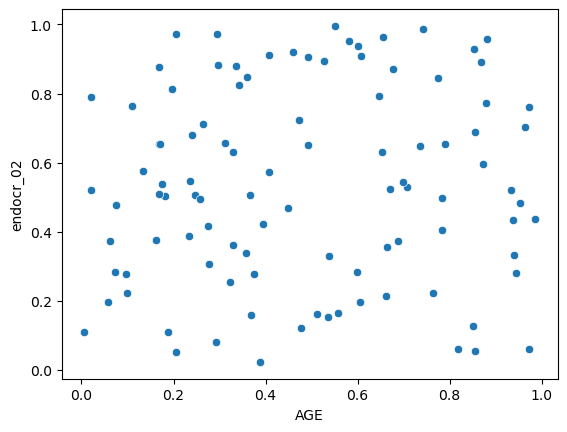

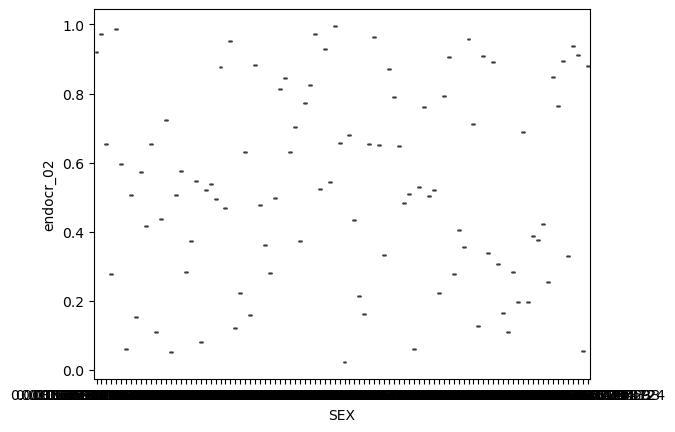

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of endocr_02 vs. age
sns.scatterplot(x='AGE', y='endocr_02', data=df)

# Show the scatter plot
plt.show()

# Box plot of endocr_02 across sex categories
sns.boxplot(x='SEX', y='endocr_02', data=df)

# Show the box plot
plt.show()


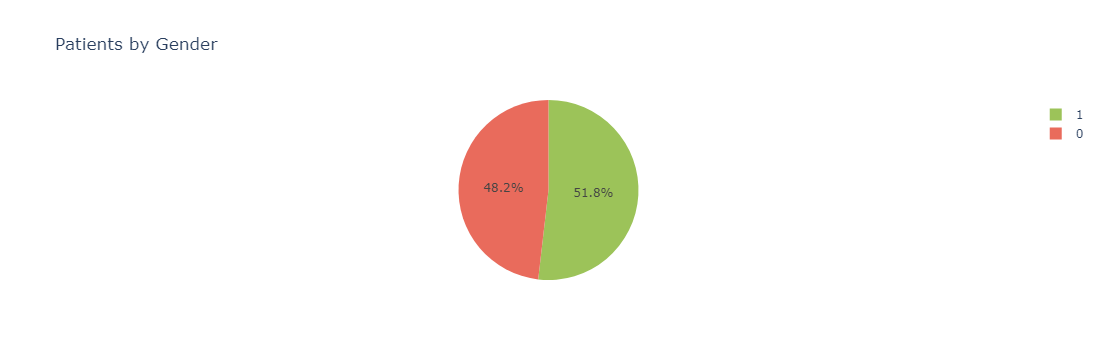

In [232]:
# patients by gender
import plotly.offline as pyo
labels = nd['SEX'].value_counts().index
values = nd['SEX'].value_counts().values

colors = ['#eba796', '#96ebda']

fig = {'data' : [{'type' : 'pie',
                  'name' : "Patients by Gender: Pie chart",
                 'labels' : nd['SEX'].value_counts().index,
                 'values' : nd['SEX'].value_counts().values,
                 'direction' : 'clockwise',
                 'marker' : {'colors' : ['#9cc359', '#e96b5c']}}], 'layout' : {'title' : 'Patients by Gender'}}

pyo.iplot(fig)


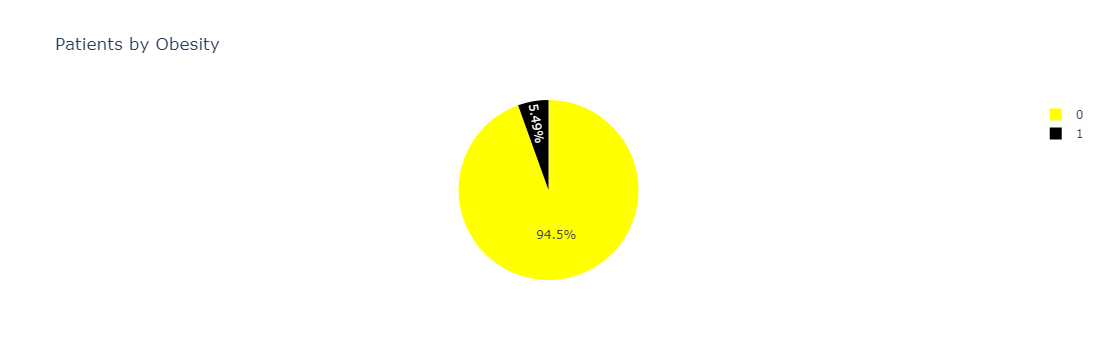

In [234]:
# patients by Obesity
import plotly.offline as pyo
labels = nd['endocr_02'].value_counts().index
values = nd['endocr_02'].value_counts().values

colors = ['yellow', 'black']

fig = {'data' : [{'type' : 'pie',
                  'name' : "Patients by Obesity: Pie chart",
                 'labels' : nd['endocr_02'].value_counts().index,
                 'values' : nd['endocr_02'].value_counts().values,
                 'direction' : 'clockwise',
                 'marker' : {'colors' : ['yellow', 'black']}}], 'layout' : {'title' : 'Patients by Obesity'}}

pyo.iplot(fig)


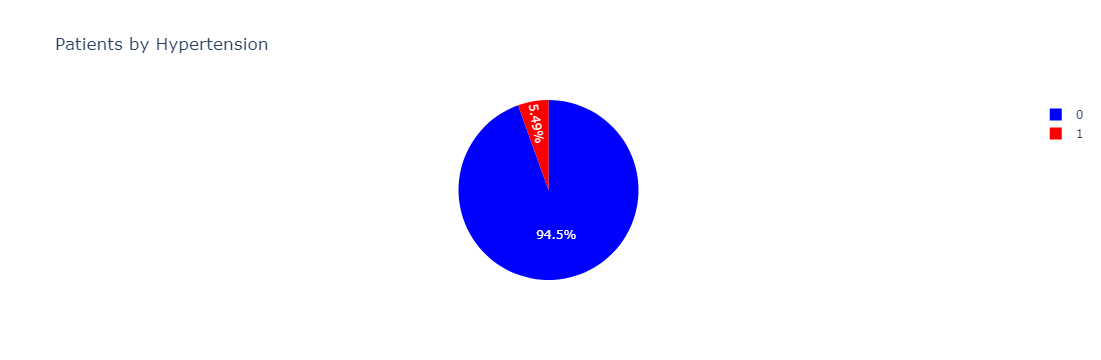

In [240]:
# patients by Hypertension 
import plotly.offline as pyo
labels = nd['SIM_GIPERT'].value_counts().index
values = nd['SIM_GIPERT'].value_counts().values

colors = ['blue', 'red']

fig = {'data' : [{'type' : 'pie',
                  'name' : "Patients by Diabetes: Pie chart",
                 'labels' : nd['SIM_GIPERT'].value_counts().index,
                 'values' : nd['SIM_GIPERT'].value_counts().values,
                 'direction' : 'clockwise',
                 'marker' : {'colors' : ['blue', 'red']}}], 'layout' : {'title' : 'Patients by Hypertension'}}

pyo.iplot(fig)

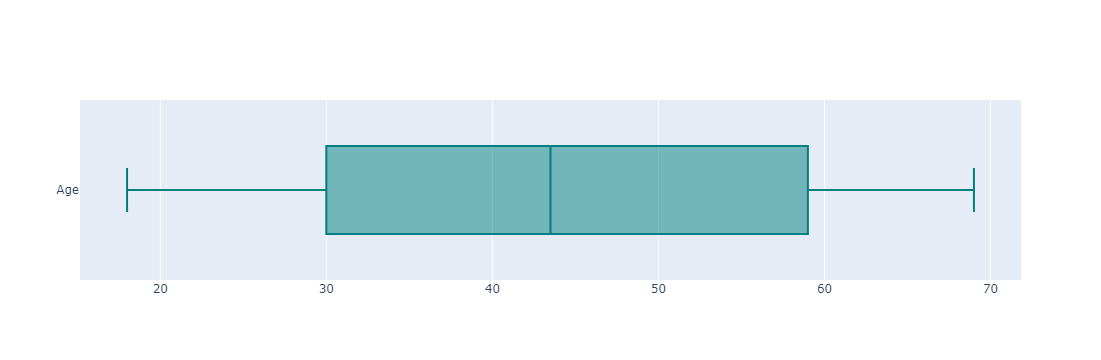

In [67]:
# Patient age range
import plotly.graph_objs as go
x0 = nd["AGE"].values

trace0 = go.Box(x=x0, name = 'Age',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    ))
data = [trace0]
pyo.iplot(data)

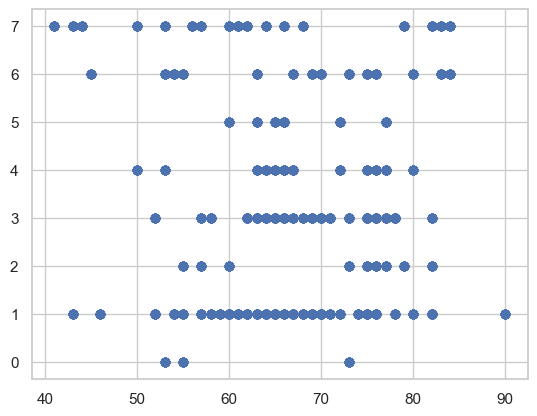

In [236]:
# LET_IS out come

#data.columns = data.columns.str.strip()
nd.columns.values

#plot the scatter plot of balance and salary variable in data
plt.scatter(nd.AGE , nd.LET_IS)
plt.show()



Text(0.5, 1.0, 'Mean Endocr_01 Value by Sex')

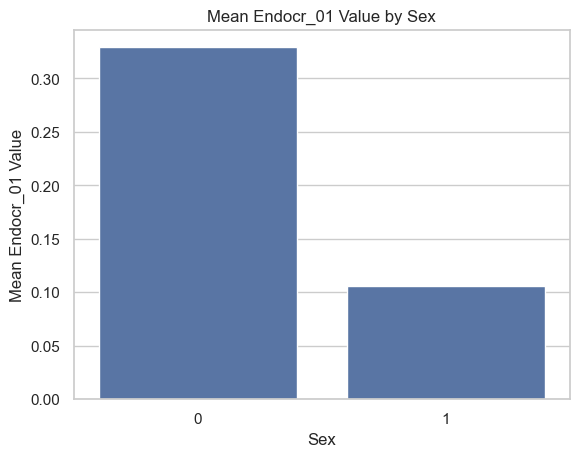

In [238]:
# calculate the mean endocr_01 values by sex
means = nd.groupby('SEX')['endocr_01'].mean()

# create a bar plot of the means
sns.barplot(x=means.index, y=means.values)

# add labels and title
plt.xlabel('Sex')
plt.ylabel('Mean Endocr_01 Value')
plt.title('Mean Endocr_01 Value by Sex')

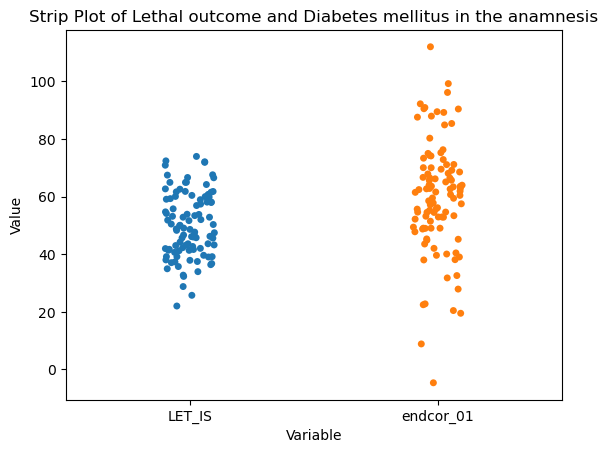

In [119]:
np.random.seed(123)
df = pd.DataFrame({'LET_IS': np.random.normal(50, 10, 100),
                   'endcor_01': np.random.normal(60, 20, 100)})

# create the strip plot
sns.stripplot(data=df[['LET_IS', 'endcor_01']], jitter=True)

# set the axis labels and title
plt.xlabel('Variable')
plt.ylabel('Value')
plt.title('Strip Plot of Lethal outcome and Diabetes mellitus in the anamnesis')

# show the plot
plt.show()

In [123]:
print(nd.columns.tolist())
nd.columns = nd.columns.str.strip()
print(nd.head())
import plotly.offline as pyo

# Check if the column exists
if 'SIM_GIPERT' in nd.columns:
    # Get labels and values
    labels = nd['SIM_GIPERT'].value_counts().index
    values = nd['SIM_GIPERT'].value_counts().values
    
    # Define colors
    colors = ['blue', 'red']

    # Create the pie chart
    fig = {
        'data': [{
            'type': 'pie',
            'name': "Patients by Hypertension: Pie chart",
            'labels': labels,
            'values': values,
            'direction': 'clockwise',
            'marker': {'colors': colors}
        }],
        'layout': {'title': 'Patients by Hypertension'}
    }

    # Plot the chart
    pyo.iplot(fig)
else:
    print("Column 'SIM_GIPERT' does not exist in the DataFrame.")


['AGE', 'endocr_02', 'SEX']
   AGE  endocr_02     SEX
0   18          0    Male
1   63          0  Female
2   63          0    Male
3   30          0  Female
4   59          0  Female
Column 'SIM_GIPERT' does not exist in the DataFrame.


Index(['AGE', 'SEX', 'endocr_02', 'GB', 'SIM_GIPERT', 'DLIT_AG', 'endocr_01',
       'INF_ANAM', 'ant_im', 'lat_im', 'post_im', 'IM_PG_P', 'LET_IS'],
      dtype='object')


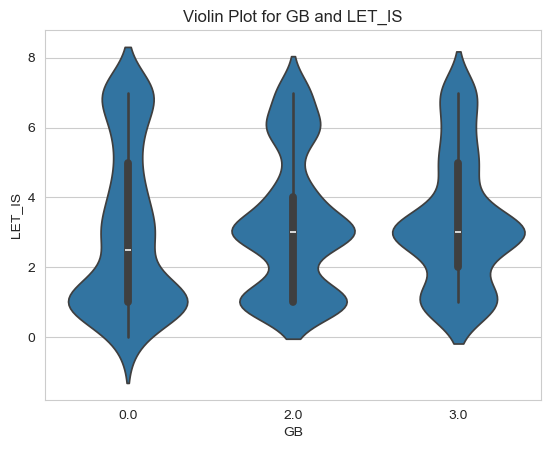

In [221]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your DataFrame
nd = pd.read_csv('C:/Users/anilr/Downloads/Myocardial infarction complications Database (2).csv')

# Check the columns in the DataFrame
print(nd.columns)

# Set the style for the plot
sns.set_style('whitegrid')

# Create a violin plot using seaborn
sns.violinplot(x='GB', y='LET_IS', data=nd)

# Set the title and labels for the plot
plt.title('Violin Plot for GB and LET_IS')
plt.xlabel('GB')
plt.ylabel('LET_IS')

# Display the plot
plt.show()



C:\Users\anilr\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning:

58.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\anilr\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning:

12.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\anilr\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning:

74.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\anilr\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning:

31.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



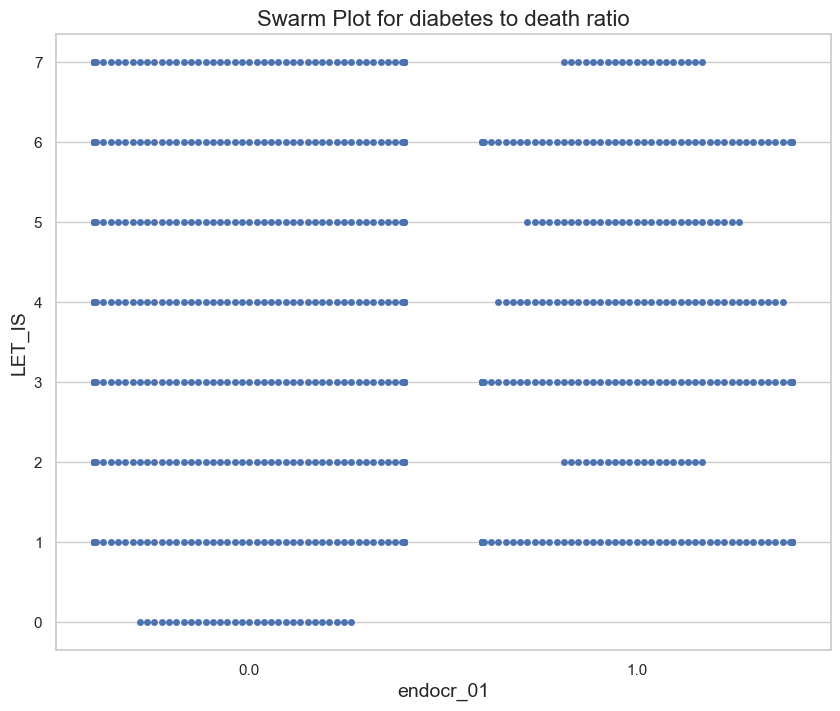

In [224]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 8))

sns.swarmplot(x="endocr_01", y="LET_IS", data=nd)

plt.xlabel("endocr_01", fontsize=14)
plt.ylabel("LET_IS", fontsize=14)
plt.title("Swarm Plot for diabetes to death ratio", fontsize=16)

plt.show()

In [ ]:
##1.4.DATA ANALYSIS - Logistic Regression

C:\Users\anilr\AppData\Local\Temp\ipykernel_30304\297874091.py:36: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



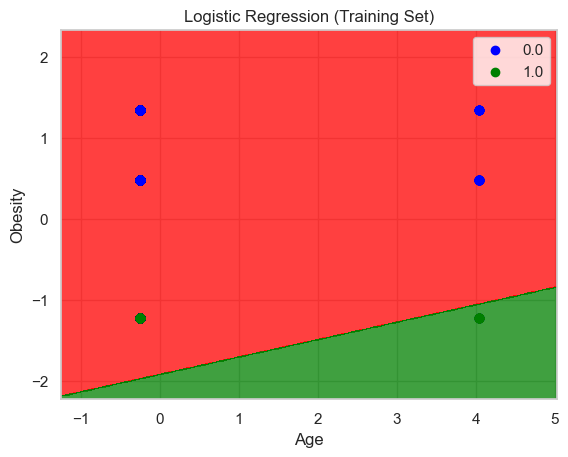

<function matplotlib.pyplot.contourf(*args, data=None, **kwargs) -> 'QuadContourSet'>

In [226]:
#%% Preprocessing
# Splitting our data set in dependent and independent variables
X = nd.iloc[:,[2,3]].values
y = nd.iloc[:,4].values
# Splitting the data set into the Training Set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

#%% Additional Preprocessing
# Sometimes it is convenient to transform the data. 
# A common approach consist in standardize the data such that 
# all variables are in the same 'range'
# i.e. here next code is based on the normal standard density
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

#%% Logistic Regression on the Training Set
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

#%% to predict the Test set results
y_pred = classifier.predict(X_test)

#%% Building the Confusion 
cm = confusion_matrix(y_test, y_pred)

#%% Visualization of Training Set Results
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                      np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('blue','green'))(i), label = j)
plt.title('Logistic Regression (Training Set)')
plt.xlabel('Age')
plt.ylabel('Obesity')
plt.legend()
plt.show()

#%% Visualization of Test Set Results
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                      np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf

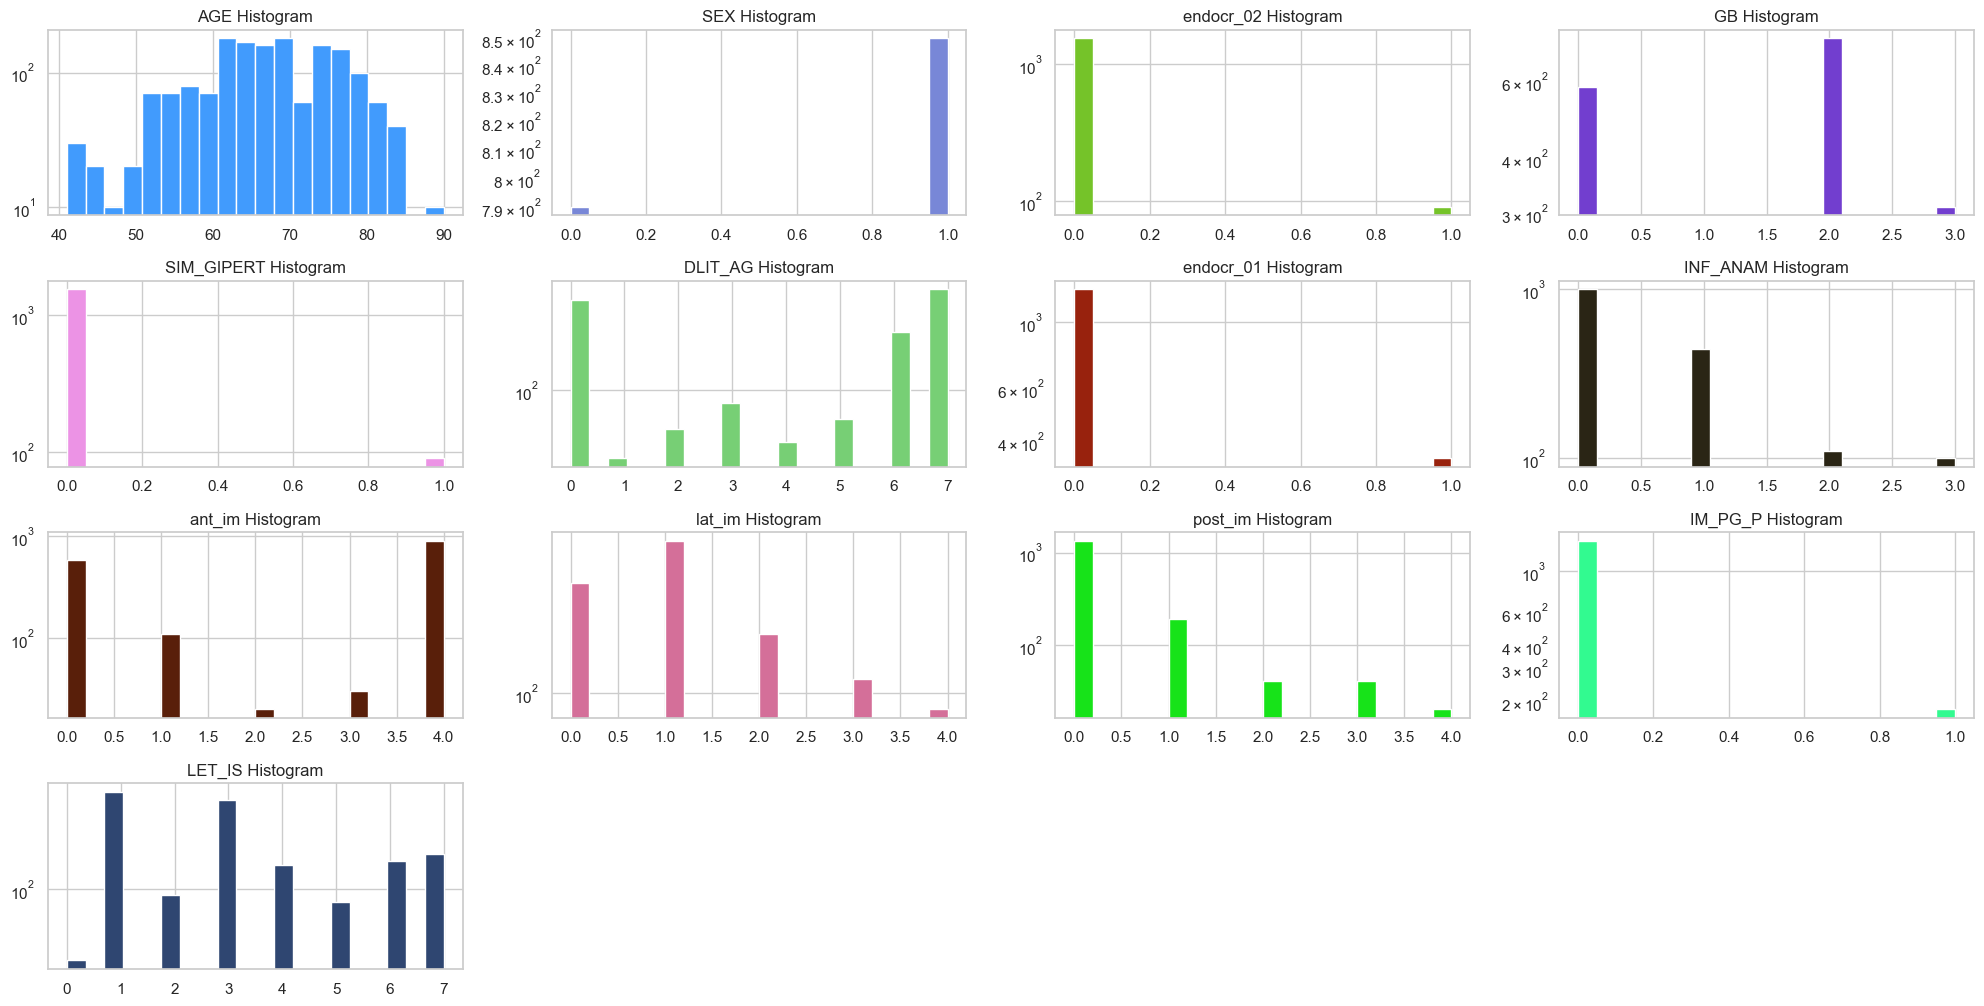

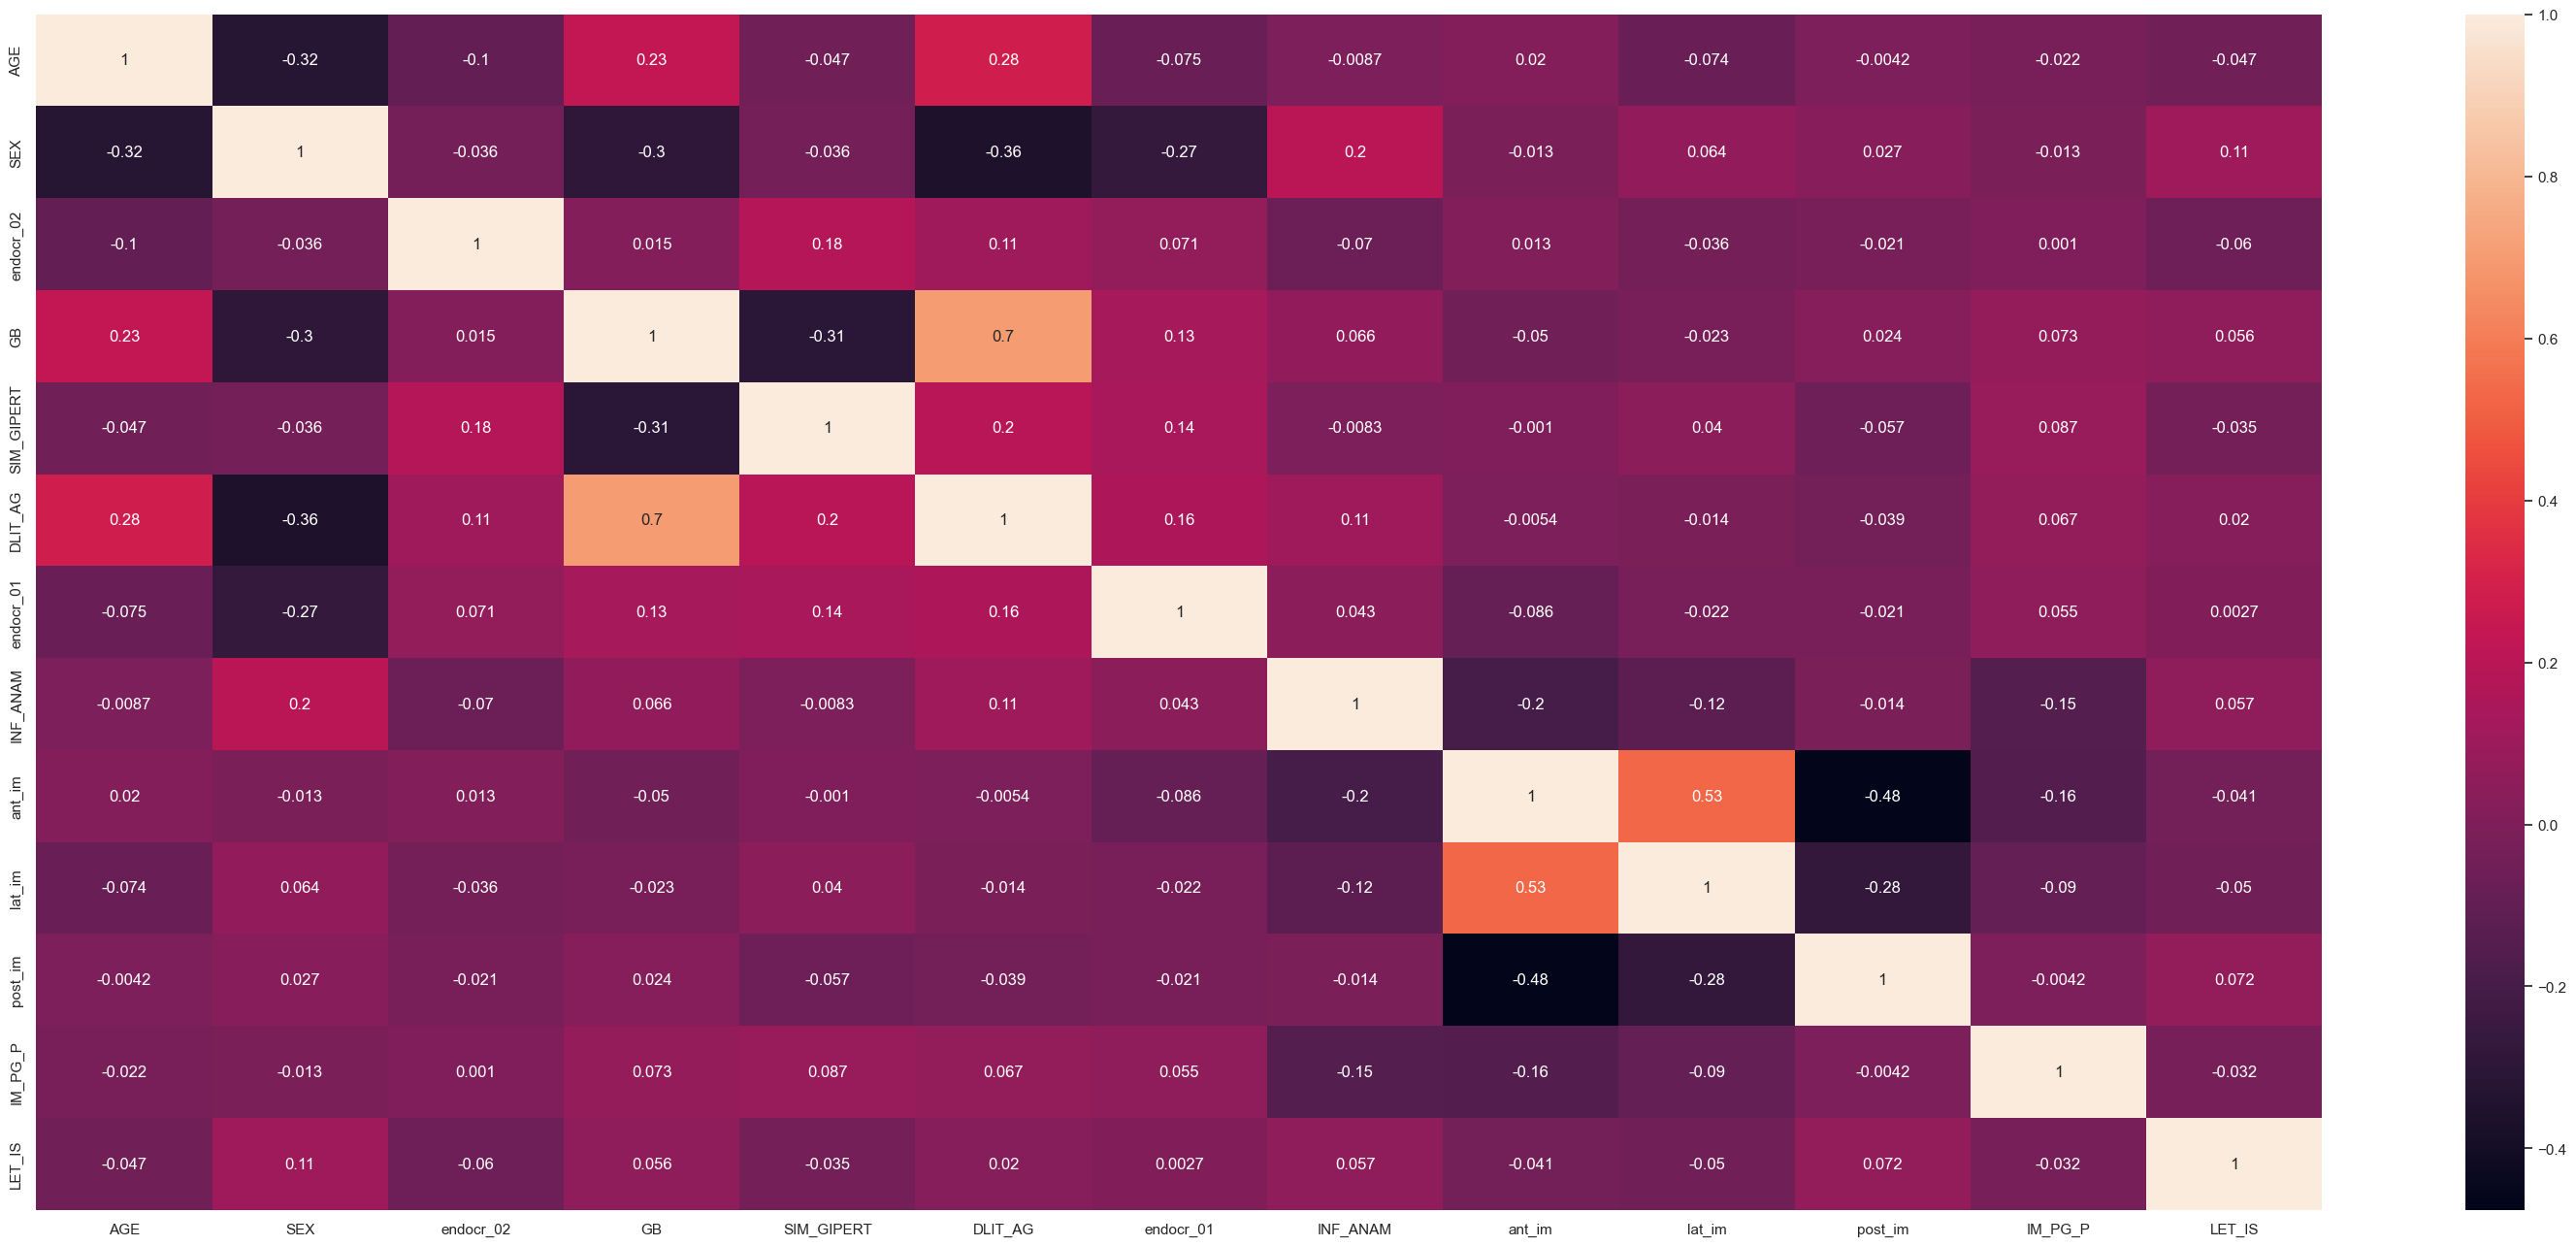

The Accuracy for Training Set is 94.71544715447155
The Accuracy for Test Set is 96.34146341463415
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       392
         1.0       0.80      0.22      0.35        18

    accuracy                           0.96       410
   macro avg       0.88      0.61      0.66       410
weighted avg       0.96      0.96      0.95       410



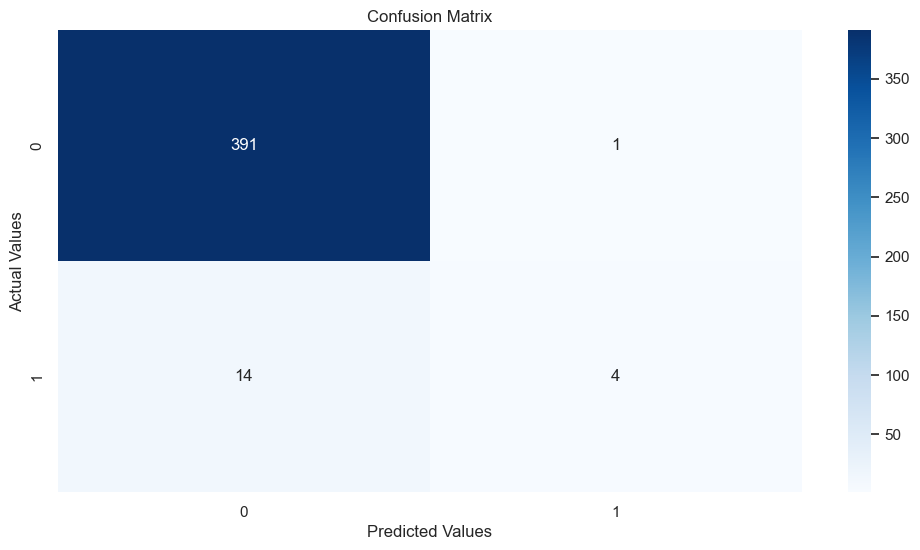

In [228]:
import random

# Define colors for histograms
colors = []
for i in range(36):
    colors.append('#{:06x}'.format(random.randint(0, 256**3)))

def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor=colors[i])
        ax.set_title(feature+" Histogram")
        ax.set_yscale('log')
    fig.tight_layout() 
    plt.savefig('Histograms.png')
    plt.show()

draw_histograms(df,nd.columns,8,4)


#%% EXPLORATORY DATA VISUALIZATION (EXTRA)
# Correlation between each pair of variables
plt.figure(figsize = (38,16))
sns.heatmap(nd.corr(), annot = True)
#plt.savefig('heatmap.png')
plt.show()


#%% Applying Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


#%% Evaluating our model (prediction stage)
train_acc = model.score(X_train_scaled, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))
# Over 99.9% accuracy, which is pretty good, but training accuracy 
# is not that useful, test accuracy is the real metric of success.

# TEST - Prediction
y_pred = model.predict(X_test_scaled)
test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))
# The test accuracy is also over 99.9% which is great.


#%% To generate a classification report
print(classification_report(y_test, y_pred))


#%% Visualization using confusion matrix
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
#plt.savefig('confusion_matrix.png')
plt.show()

In [211]:
df = pd.read_csv("C:/Users/anilr/Downloads/Myocardial infarction complications Database (2).csv")

print(df.columns)
required_columns = ['endocr_02', 'GB', 'SIM_GIPERT', 'LET_IS']
if all(col in df.columns for col in required_columns):
    counts = df.groupby(['endocr_02', 'GB', 'SIM_GIPERT'])['LET_IS'].value_counts()
    print(counts)
else:
    print("One or more required columns are missing.")

counts = df.groupby(['endocr_02', 'GB', 'SIM_GIPERT'])['LET_IS'].value_counts()
print(counts)


# Check if required columns exist
required_columns = ['endocr_02', 'GB', 'SIM_GIPERT', 'LET_IS']
if all(col in df.columns for col in required_columns):
    counts = df.groupby(['endocr_02', 'GB', 'SIM_GIPERT'])['LET_IS'].value_counts()
    print(counts)
else:
    print("One or more required columns are missing:", [col for col in required_columns if col not in df.columns])


Index(['AGE', 'SEX', 'endocr_02', 'GB', 'SIM_GIPERT', 'DLIT_AG', 'endocr_01',
       'INF_ANAM', 'ant_im', 'lat_im', 'post_im', 'IM_PG_P', 'LET_IS'],
      dtype='object')
endocr_02  GB   SIM_GIPERT  LET_IS
0.0        0.0  0.0         1         180
                            7          80
                            2          40
                            3          40
                            4          40
                            6          40
                            0          30
                            5          30
                1.0         3          30
                            1          20
                            4          10
                            7          10
           2.0  0.0         1         220
                            3         210
                            6          90
                            4          80
                            7          60
                            2          30
                            5        

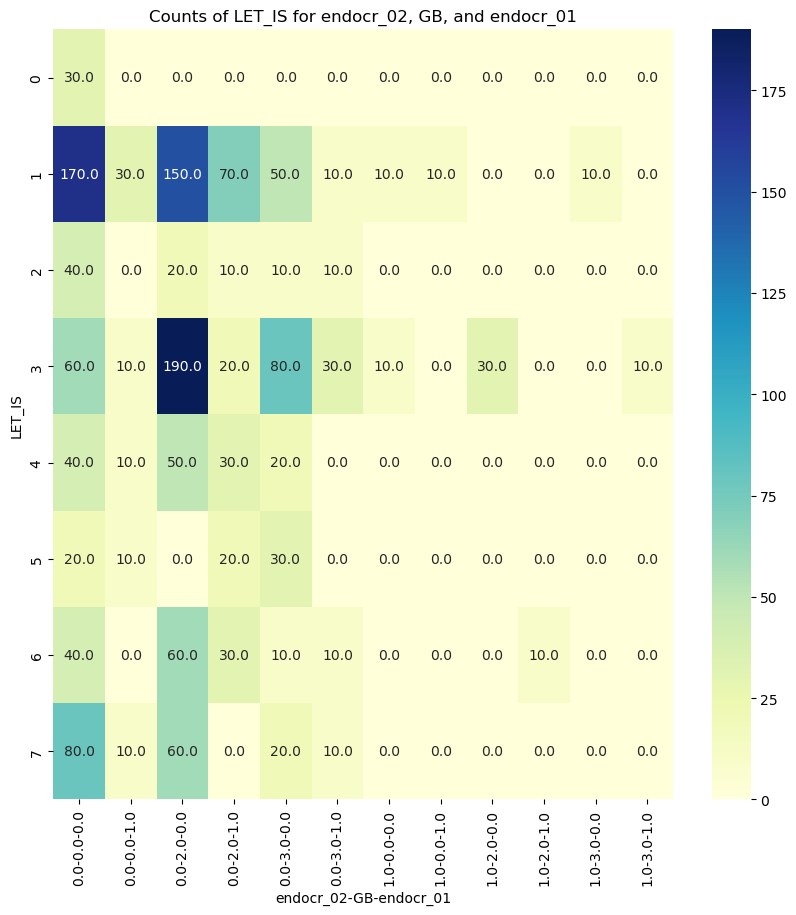

In [213]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('C:/Users/anilr/Downloads/Myocardial infarction complications Database (2).csv')

# reset index to avoid duplicates
counts = df.groupby(['endocr_02', 'GB', 'endocr_01'])['LET_IS'].value_counts().reset_index(name='count')

# pivot table to reshape the data
counts_pivot = counts.pivot_table(values='count', index=['LET_IS'], columns=['endocr_02', 'GB', 'endocr_01'], fill_value=0)

# plot heatmap
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(counts_pivot, cmap='YlGnBu', annot=True, fmt='.1f', ax=ax)  # Use '.1f' for formatting floats
ax.set_title('Counts of LET_IS for endocr_02, GB, and endocr_01')
plt.show()
#people with obesity have no myocardial infarction
#people with BP have more chances of myocardial infarction

    SEX  endocr_02   GB  LET_IS  count
0     0        0.0  0.0       0     10
1     0        0.0  0.0       1     60
2     0        0.0  0.0       3     30
3     0        0.0  0.0       4     10
4     0        0.0  0.0       5     20
5     0        0.0  0.0       7     10
6     0        0.0  2.0       1    140
7     0        0.0  2.0       2     10
8     0        0.0  2.0       3    120
9     0        0.0  2.0       4     70
10    0        0.0  2.0       5     10
11    0        0.0  2.0       6     50
12    0        0.0  2.0       7     20
13    0        0.0  3.0       1     40
14    0        0.0  3.0       2     10
15    0        0.0  3.0       3     90
16    0        0.0  3.0       4     10
17    0        0.0  3.0       5     20
18    0        0.0  3.0       7     10
19    0        1.0  0.0       1     20
20    0        1.0  2.0       3     10
21    0        1.0  2.0       6     10
22    0        1.0  3.0       3     10
23    1        0.0  0.0       0     20
24    1        0.0  0.0  

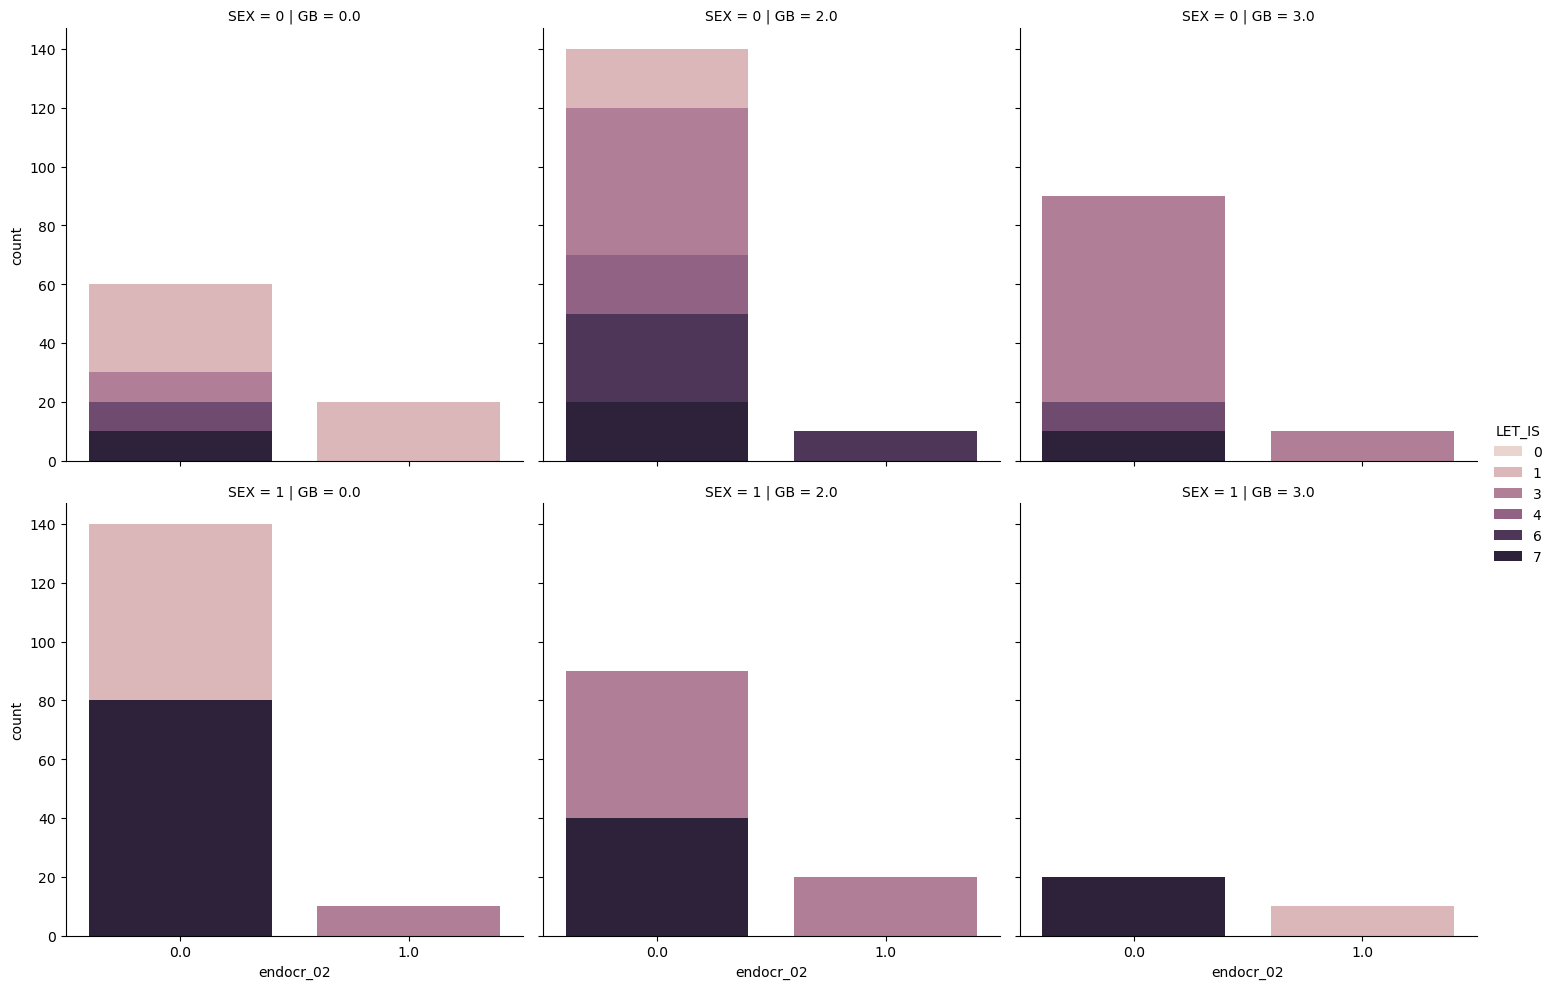

In [217]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# load the data
df = pd.read_csv('C:/Users/anilr/Downloads/Myocardial infarction complications Database (2).csv')

# group the data by age, sex, endocr_02, GB, and LET_IS and count the occurrences
counts = df.groupby([ 'SEX', 'endocr_02', 'GB', 'LET_IS'])['SIM_GIPERT'].count().reset_index(name='count')
print(counts)

# create a stacked bar chart
sns.catplot(data=counts, x='endocr_02', y='count', hue='LET_IS', col='GB', row='SEX', kind='bar', dodge=False)
plt.show()